In [75]:
import pandas as pd
import numpy as np

In [82]:
df = pd.read_csv("/Users/Efecan/Desktop/Computational Statistics PhD/ml-10M100K/ratings.dat", delimiter = "::", header = None, engine = 'python')
df.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

In [48]:
unique_user_ids = df["UserID"].nunique()

In [49]:
unique_user_ids

69878

Filtering users with at least 100 reviews

In [50]:
user_counts= df["UserID"].groupby(df["UserID"]).size()
users_with_100_reviews = user_counts[user_counts >= 100]
len(users_with_100_reviews)

26884

lmer, maximum likelihood, using a gradient-free optimization procedure applied to the
profiled likelihood, implemented in C++ and R by the lme4 R package (Bates et al.,
2013).

In [51]:
user_ids = users_with_100_reviews.index.to_numpy()
filtered_df = df[df["UserID"].isin(user_ids)]

In [52]:
len(filtered_df)

7995532

# First Subsample - Based on Unique IDs

We create the first subsample of users by randomly choosing from the unique ids. Since we split into 10 we want the subsample to have a size of 26884 // 10. Later we combine this subsampled users with other datasets, meaning filtering other datasets relative to subsample userids.

In [53]:
unique_ids_to_sample_from = filtered_df["UserID"].unique()

In [54]:
len(unique_ids_to_sample_from)

26884

In [55]:
sample_size = len(unique_ids_to_sample_from) // 10
a = np.random.choice(unique_ids_to_sample_from, size = (10 * sample_size), replace = False)


In [56]:
import numpy as np

# Let's assume you have an array of integers, for example:

# To create 10 non-overlapping samples from this array
# First, let's shuffle the array to ensure randomness

# Now, we define a function to split the array into 10 non-overlapping splits
def create_splits(arr, num_splits):
    # Determine the size of each split
    np.random.shuffle(arr)
    split_size = len(arr) // num_splits
    # Create non-overlapping splits
    splits = [arr[i * split_size:(i + 1) * split_size] for i in range(num_splits)]
    return splits

# Generate the 10 non-overlapping splits
splits = create_splits(unique_ids_to_sample_from, 10)

In [57]:
splits

[array([ 4361,  7715, 48006, ..., 11063, 18018, 11597]),
 array([ 5540,  5028,  3600, ...,  5732, 20668, 46401]),
 array([32916, 20706, 38912, ..., 37693, 21759, 47401]),
 array([ 8441, 38115, 36323, ..., 11404, 65832, 29473]),
 array([37442, 44208, 35113, ..., 24937,  9914, 20404]),
 array([41939, 64301,  1987, ..., 60107, 27056, 62261]),
 array([ 8532, 71063, 10623, ..., 18199, 31499, 39232]),
 array([21374, 14962, 57713, ..., 27528, 31045, 23574]),
 array([63382, 69374,  1569, ..., 70344, 37029, 62394]),
 array([53100, 32885,  3626, ..., 51578, 63036, 27773])]

In [66]:
ratings1 = filtered_df[filtered_df["UserID"].isin(splits[0])]
ratings2 = filtered_df[filtered_df["UserID"].isin(splits[1])]
ratings3 = filtered_df[filtered_df["UserID"].isin(splits[2])]
ratings4 = filtered_df[filtered_df["UserID"].isin(splits[3])]
ratings5 = filtered_df[filtered_df["UserID"].isin(splits[4])]
ratings6 = filtered_df[filtered_df["UserID"].isin(splits[5])]
ratings7 = filtered_df[filtered_df["UserID"].isin(splits[6])]
ratings8 = filtered_df[filtered_df["UserID"].isin(splits[7])]
ratings9 = filtered_df[filtered_df["UserID"].isin(splits[8])]
ratings10 = filtered_df[filtered_df["UserID"].isin(splits[9])]

In [95]:
movies = pd.read_csv("/Users/Efecan/Desktop/Computational Statistics PhD/ml-10M100K/movies.dat", delimiter = "::", header = None, engine = 'python')
movies.columns = ["MovieID", "Title", "Genres"]
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


In [69]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert 'Genres' into a list of genres
movies['Genres'] = movies['Genres'].str.split('|')

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform 'Genres' and create a DataFrame
genres_encoded = pd.DataFrame(mlb.fit_transform(movies['Genres']), columns=mlb.classes_)

# Combine the original DataFrame with the new 'genres_encoded' DataFrame
movies_encoded = pd.concat([movies, genres_encoded], axis=1)

# Display the first few rows of the updated dataset
movies_encoded.head()

,MovieID,Title,Genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
movies_encoded = movies_encoded.rename(columns = {"(no genres listed)": "no_genre", "Film-Noir": "Film_Noir", "Sci-Fi":"SciFi"})
movies_encoded = movies_encoded.drop(columns = ['Title', 'Genres'])

In [71]:
sample1 = ratings1.merge(movies_encoded, left_on="MovieID", right_on="MovieID", how="inner")
sample2 = ratings2.merge(movies_encoded, left_on="MovieID", right_on="MovieID", how="inner")
sample3 = ratings3.merge(movies_encoded, left_on="MovieID", right_on="MovieID", how="inner")
sample4 = ratings4.merge(movies_encoded, left_on="MovieID", right_on="MovieID", how="inner")
sample5 = ratings5.merge(movies_encoded, left_on="MovieID", right_on="MovieID", how="inner")
sample6 = ratings6.merge(movies_encoded, left_on="MovieID", right_on="MovieID", how="inner")
sample7 = ratings7.merge(movies_encoded, left_on="MovieID", right_on="MovieID", how="inner")
sample8 = ratings8.merge(movies_encoded, left_on="MovieID", right_on="MovieID", how="inner")
sample9 = ratings9.merge(movies_encoded, left_on="MovieID", right_on="MovieID", how="inner")
sample10 = ratings10.merge(movies_encoded, left_on="MovieID", right_on="MovieID", how="inner")

In [72]:
sample1.to_csv('sample1.csv')
sample2.to_csv('sample2.csv')
sample3.to_csv('sample3.csv')
sample4.to_csv('sample4.csv')
sample5.to_csv('sample5.csv')
sample6.to_csv('sample6.csv')
sample7.to_csv('sample7.csv')
sample8.to_csv('sample8.csv')
sample9.to_csv('sample9.csv')
sample10.to_csv('sample10.csv')

## Relationally Filtering Other Datasets

In [18]:
movies = pd.read_csv("/Users/Efecan/Desktop/Computational Statistics PhD/ml-10M100K/movies.dat", delimiter = "::", header = None, engine = 'python')
movies.columns = ["MovieID", "Title", "Genres"]

In [19]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


In [20]:
movies1 = movies[movies["MovieID"].isin(ratings1["MovieID"].unique())]

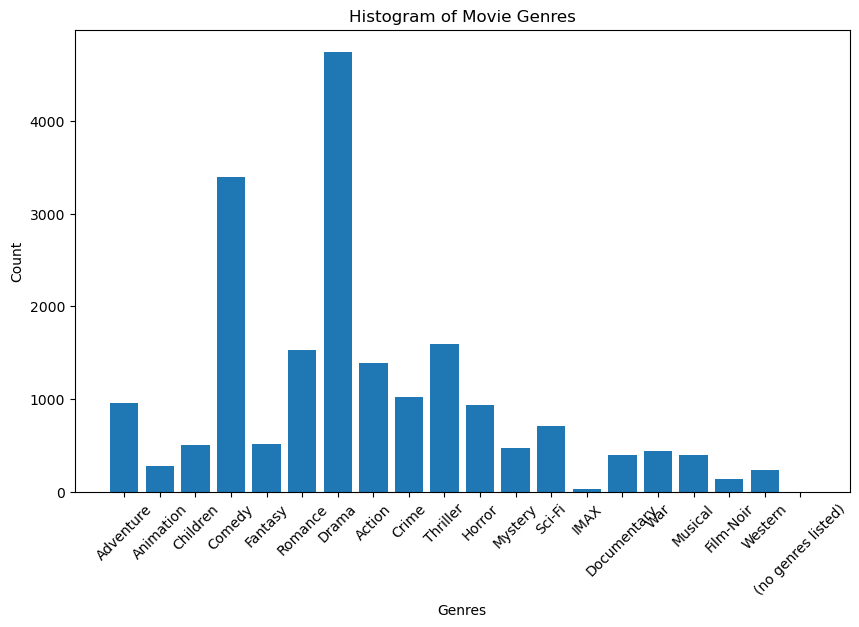

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

all_genres = [genre for sublist in movies1["Genres"].str.split('|') for genre in sublist]

# Count occurrences of each genre
genre_counts = Counter(all_genres)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genre_counts.keys(), genre_counts.values())
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Histogram of Movie Genres')
plt.xticks(rotation=45)
plt.show()

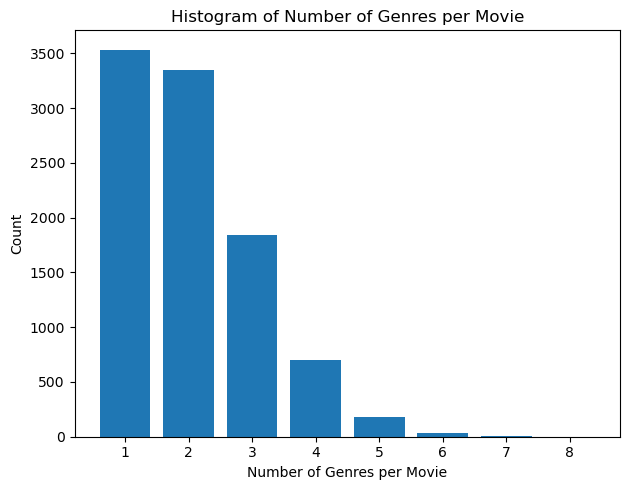

In [22]:
# Count number of genres per movie
num_genres_per_movie = movies1['Genres'].str.split('|').apply(len)
num_genres_counts = Counter(num_genres_per_movie)

# Plotting
plt.figure(figsize=(12, 5))


# Histogram of number of genres per movie
plt.subplot(1, 2, 2)
plt.bar(num_genres_counts.keys(), num_genres_counts.values())
plt.xlabel('Number of Genres per Movie')
plt.ylabel('Count')
plt.title('Histogram of Number of Genres per Movie')

plt.tight_layout()
plt.show()

In [23]:
tags = pd.read_csv("/Users/Efecan/Desktop/Computational Statistics PhD/ml-10M100K/tags.dat", delimiter = "::", header = None, engine = 'python')
tags.columns = ['UserID', 'MovieID', 'Tag', 'Timestamp']

In [25]:
tags1 = tags[tags["UserID"].isin(sampled_users)]

In [26]:
tags1

,UserID,MovieID,Tag,Timestamp
1754,175,2819,skullduggery,1188441420
1755,175,51540,bad ending,1192990133
1886,477,318,Frankly the most watchable film ever made,1188312903
1887,477,1120,Great. Surprise excellence from Mrs.Cobain,1188311498
1888,477,1188,but a fun comedy.,1188311560
...,...,...,...,...
94407,71037,1284,Humphrey Bogart,1214929078
94408,71037,1284,imdb top 250,1214929083
94409,71037,1284,mystery,1214929086
94410,71037,1284,noir,1214929092


In [27]:
len(ratings1.join(movies1, on="MovieID", lsuffix = "sample", rsuffix = "movies", how = "left")) - len(ratings1.join(movies1, on="MovieID", lsuffix = "sample", rsuffix = "movies", how = "inner"))

61525

There's mismatch when we do iner join vs left join. This means that not all of the movies users rated are in the movies dataframe

In [28]:
ratings_movies = ratings1.merge(movies1, left_on="MovieID", right_on="MovieID", how="inner")

In [29]:
ratings_movies

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,51,7,2.0,942230135,Sabrina (1995),Comedy|Romance
1,214,7,3.0,959798189,Sabrina (1995),Comedy|Romance
2,351,7,2.0,955831647,Sabrina (1995),Comedy|Romance
3,533,7,2.5,1161285615,Sabrina (1995),Comedy|Romance
4,812,7,4.0,868361483,Sabrina (1995),Comedy|Romance
...,...,...,...,...,...,...
782571,71190,6113,1.0,1043633740,Godard's Passion (Passion) (1982),Drama
782572,71190,6136,4.0,1043633639,"South, The (El Sur) (1983)",Drama|Romance
782573,71281,6938,4.0,1096885729,Billabong Odyssey (2003),Documentary
782574,71281,8503,3.0,1200144054,Ivanhoe (1952),Adventure|Drama|Romance


In [30]:
subsample1 = pd.merge(ratings_movies, tags1, left_on = ["UserID", "MovieID"], right_on = ["UserID", "MovieID"], how = "left")

In [31]:
subsample1

,UserID,MovieID,Rating,Timestamp_x,Title,Genres,Tag,Timestamp_y
0,51,7,2.0,942230135,Sabrina (1995),Comedy|Romance,NaN,NaN
1,214,7,3.0,959798189,Sabrina (1995),Comedy|Romance,NaN,NaN
2,351,7,2.0,955831647,Sabrina (1995),Comedy|Romance,NaN,NaN
3,533,7,2.5,1161285615,Sabrina (1995),Comedy|Romance,NaN,NaN
4,812,7,4.0,868361483,Sabrina (1995),Comedy|Romance,NaN,NaN
...,...,...,...,...,...,...,...,...
784202,71190,6113,1.0,1043633740,Godard's Passion (Passion) (1982),Drama,NaN,NaN
784203,71190,6136,4.0,1043633639,"South, The (El Sur) (1983)",Drama|Romance,NaN,NaN
784204,71281,6938,4.0,1096885729,Billabong Odyssey (2003),Documentary,NaN,NaN
784205,71281,8503,3.0,1200144054,Ivanhoe (1952),Adventure|Drama|Romance,NaN,NaN


In [32]:
subsample1.to_csv('subsample1.csv')

# Creating Random 10 Subsamples

In [72]:
filtered_df

,UserID,MovieID,Rating,Timestamp
242,7,32,4.0,1049820474
243,7,50,4.0,1050329529
244,7,101,4.5,1054292314
245,7,260,3.0,1049820445
246,7,541,2.0,1049820445
...,...,...,...,...
9999947,71565,3789,4.0,974295682
9999948,71565,3808,4.0,974295467
9999949,71565,3811,4.0,974295234
9999950,71565,3812,4.0,974294786


In [73]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


In [74]:
sample = pd.merge(filtered_df, movies, left_on = ["MovieID"], right_on = ["MovieID"], how = "left")

In [75]:
sample

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,7,32,4.0,1049820474,12 Monkeys (Twelve Monkeys) (1995),Sci-Fi|Thriller
1,7,50,4.0,1050329529,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
2,7,101,4.5,1054292314,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
3,7,260,3.0,1049820445,Star Wars: Episode IV - A New Hope (a.k.a. Sta...,Action|Adventure|Sci-Fi
4,7,541,2.0,1049820445,Blade Runner (1982),Adventure|Drama|Film-Noir|Sci-Fi|Thriller
...,...,...,...,...,...,...
7995527,71565,3789,4.0,974295682,"Pawnbroker, The (1964)",Drama
7995528,71565,3808,4.0,974295467,Two Women (La Ciociara) (1961),Drama|War
7995529,71565,3811,4.0,974295234,Breaker Morant (1980),Drama|War
7995530,71565,3812,4.0,974294786,Everything You Always Wanted to Know About Sex...,Comedy


In [76]:
sample = sample.sample(frac=1)

In [77]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert 'Genres' into a list of genres
sample['Genres'] = sample['Genres'].str.split('|')

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Transform 'Genres' and create a DataFrame
genres_encoded = pd.DataFrame(mlb.fit_transform(sample['Genres']), columns=mlb.classes_)

# Combine the original DataFrame with the new 'genres_encoded' DataFrame
data_combined = pd.concat([sample, genres_encoded], axis=1)

# Display the first few rows of the updated dataset
data_combined.head()


,UserID,MovieID,Rating,Timestamp,Title,Genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3929089,35076,50,5.0,975177393,"Usual Suspects, The (1995)","[Crime, Mystery, Thriller]",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3646677,32444,4623,4.5,1118182932,Major League (1989),[Comedy],0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7533349,67532,111,4.0,907941171,Taxi Driver (1976),"[Crime, Drama, Thriller]",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6762738,60752,4234,4.0,992779163,"Tailor of Panama, The (2001)","[Drama, Thriller]",0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3164749,28289,49932,3.5,1188862793,Inland Empire (2006),"[Drama, Film-Noir, Horror, Mystery, Thriller]",0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
data_combined = data_combined.rename(columns = {"(no genres listed)": "no_genre", "Film-Noir": "Film_Noir", "Sci-Fi":"SciFi"})
data_combined = data_combined.drop(columns = ['Timestamp', 'Title', 'Genres'])

In [79]:
subsamples = []
split_size = len(data_combined) // 10
for i in range(10):
    start = i * split_size
    # If it's the last split, make sure to include the remainder
    end = None if i == 9 else (i + 1) * split_size
    subsamples.append(data_combined.iloc[start:end])


In [67]:
subsample1 = subsamples[0]
subsample2 = subsamples[1]
subsample3 = subsamples[2]
subsample4 = subsamples[3]
subsample5 = subsamples[4]
subsample6 = subsamples[5]
subsample7 = subsamples[6]
subsample8 = subsamples[7]
subsample9 = subsamples[8]
subsample10 = subsamples[9]

In [68]:
subsample1

,UserID,MovieID,Rating,no_genre,Action,Adventure,Animation,Children,Comedy,Crime,...,Film_Noir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
3727962,33217,4639,4.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4937276,44076,2335,3.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2646567,23791,6558,3.5,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2034903,18412,480,5.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
5790350,51718,3016,2.0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666779,23968,10,2.5,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2516740,22801,2115,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1601635,14614,51662,5.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
5839799,52171,1286,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
subsample1.to_csv('subsample1.csv')
subsample2.to_csv('subsample2.csv')
subsample3.to_csv('subsample3.csv')
subsample4.to_csv('subsample4.csv')
subsample5.to_csv('subsample5.csv')
subsample6.to_csv('subsample6.csv')
subsample7.to_csv('subsample7.csv')
subsample8.to_csv('subsample8.csv')
subsample9.to_csv('subsample9.csv')
subsample10.to_csv('subsample10.csv')

In [80]:
data_combined.to_csv('alldata.csv')

In [4]:
import pandas as pd
subsample1 = pd.read_csv('subsample1.csv')

In [5]:
subsample1

,Unnamed: 0,UserID,MovieID,Rating,no_genre,Action,Adventure,Animation,Children,Comedy,...,Film_Noir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,3727962,33217,4639,4.0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,4937276,44076,2335,3.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2646567,23791,6558,3.5,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2034903,18412,480,5.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,1,0
4,5790350,51718,3016,2.0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799548,2666779,23968,10,2.5,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
799549,2516740,22801,2115,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
799550,1601635,14614,51662,5.0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
799551,5839799,52171,1286,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# User - Feature Create

In [85]:
!pwd

/Users/Efecan/Desktop/Computational Statistics PhD


In [17]:
# data/ml-10m/make_features.py
# --

import collections
import csv
import sys

# read in movies
with open("movie.csv", "r") as f:
    f.readline() # discard header
    movie = [tuple(r) for r in csv.reader(f)]

MOVIE_ID = 1
MOVIE_TITLE = 2
MOVIE_GENRES = 3

movie_ix = {}
for i,m in enumerate(movie):
    movie_ix[m[MOVIE_ID]] = i

# read in raw ratings
with open("rating.csv", "r") as f:
    f.readline() # discard header
    raw_rating = [tuple(r) for r in csv.reader(f)]

RAW_RATING_USER = 1
RAW_RATING_MOVIE = 2
RAW_RATING_SCORE = 3
RAW_RATING_TIMESTAMP = 4

# build user list
user = list(set([(r[RAW_RATING_USER],) for r in raw_rating]))
USER_ID = 0
user.sort(key=lambda u: int(u[USER_ID]))

user_ix = {}
for i,u in enumerate(user):
    user_ix[u[USER_ID]] = i






In [18]:
# normalize ratings, sort in order of timestamps
rating = [(i, user_ix[r[RAW_RATING_USER]], movie_ix[r[RAW_RATING_MOVIE]],
           float(r[RAW_RATING_SCORE]), int(float(r[RAW_RATING_TIMESTAMP])))
          for i, r in enumerate(raw_rating)]
del raw_rating # free up memory





In [19]:
rating

[(0, 0, 120, 5.0, 838985046),
 (1, 0, 183, 5.0, 838983525),
 (2, 0, 228, 5.0, 838983392),
 (3, 0, 289, 5.0, 838983421),
 (4, 0, 313, 5.0, 838983392),
 (5, 0, 325, 5.0, 838983392),
 (6, 0, 351, 5.0, 838984474),
 (7, 0, 352, 5.0, 838983653),
 (8, 0, 358, 5.0, 838984885),
 (9, 0, 360, 5.0, 838983707),
 (10, 0, 366, 5.0, 838984596),
 (11, 0, 373, 5.0, 838983834),
 (12, 0, 416, 5.0, 838983834),
 (13, 0, 462, 5.0, 838984679),
 (14, 0, 476, 5.0, 838983653),
 (15, 0, 516, 5.0, 838984679),
 (16, 0, 535, 5.0, 838984068),
 (17, 0, 580, 5.0, 838984068),
 (18, 0, 582, 5.0, 838983339),
 (19, 0, 583, 5.0, 838983778),
 (20, 0, 588, 5.0, 838984679),
 (21, 0, 610, 5.0, 838984941),
 (22, 1, 108, 5.0, 868245777),
 (23, 1, 149, 3.0, 868246450),
 (24, 1, 257, 5.0, 868244562),
 (25, 1, 372, 3.0, 868245920),
 (26, 1, 535, 3.0, 868246262),
 (27, 1, 584, 5.0, 868245608),
 (28, 1, 640, 2.0, 868244699),
 (29, 1, 707, 3.0, 868246191),
 (30, 1, 721, 3.0, 868244562),
 (31, 1, 724, 3.0, 868244698),
 (32, 1, 767, 3.0,

In [20]:
RATING_ID = 0
RATING_USER_IX = 1
RATING_MOVIE_IX = 2
RATING_SCORE = 3
RATING_TIMESTAMP = 4
rating.sort(key=lambda r: r[RATING_TIMESTAMP])

rating_ix = {}
for i,r in enumerate(rating):
    rating_ix[r[RATING_ID]] = i


# recent reviews for each movie
MOVIE_WINDOW_LEN = 30
movie_y = [collections.deque(maxlen=MOVIE_WINDOW_LEN)
           for i in range(len(movie))]

# length of current positive review streak for each user
user_pos_len = [0] * len(user)
user_neg_len = [0] * len(user)

rating_var = []
RATING_VAR_USER_POS_LEN = 0 # number of user's positive reviews before the current one
RATING_VAR_USER_NEG_LEN = 1 # number of user's negative reviews before the current one
RATING_VAR_MOVIE_POS = 2 # number of recent positive reviews for the movie
RATING_VAR_MOVIE_NEG = 3 # number of recent negative reviews for the movie


for r in rating:
    u = r[RATING_USER_IX]
    pu = user_pos_len[u]
    nu = user_neg_len[u]
    
    m = r[RATING_MOVIE_IX]
    ym = movie_y[m]
    tm = len(ym)
    pm = ym.count(True)
    nm = tm - pm
    
    rating_var.append((pu,nu,pm,nm))
    
    y = r[RATING_SCORE] >= 4.0
    if y:
        user_pos_len[u] = pu + 1
        user_neg_len[u] = 0
    else:
        user_pos_len[u] = 0
        user_neg_len[u] = nu + 1
    ym.append(y)


with open("rating-feature.csv", "w") as f:
    f.write("user_pos_len,user_neg_len,movie_pos,movie_neg\n")
    w = csv.writer(f)
    
    for rid in range(len(rating)):
        i = rating_ix[rid]
        rx = rating_var[i]
        w.writerow(rx)
